<a href="https://colab.research.google.com/github/JangSungIl80/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding='utf-8', sep=',', header=0, index_col=None, nrows=None)
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
# with open('data.json', mode='r', encoding='utf-8') as f:
#   data =json.load(f)

## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', encoding='utf-8')

print(df)

FileNotFoundError: File data.json does not exist

## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
from ast import pattern
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성
pattern = re.compile(r'(\d{6})-(\d{7})')

## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******', content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301.log' , mode='w') as f:
  f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response =  requests.get(url, params=params)
    response.raise_for_status() ##가져올때 에러나면
    ## JSON 데이터 읽기
    data = response.json()
    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.020503997802734375, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-09-21T09:00', 'interval': 900, 'temperature_2m': 23.7}}
서울시 종로구의 현재 온도는 : 23.7°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115M  100  115M    0     0   212M      0 --:--:-- --:--:-- --:--:--  212M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
google-chrome-stable is already the newest version (140.0.7339.185-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://github.com/jaehwachung/Data-Analysis-with-Open-Source'
driver.get(url)
## 사이트 접속 대기
time.sleep(3)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

title_text = tree.xpath('//title/text()')
print(title_text)
## 드라이버 종료
driver.quit()

['GitHub - jaehwachung/Data-Analysis-with-Open-Source: Data Analysis with Open Source']



# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty'
api_key = ''

params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집
response = requests.get(url, params=params)
## 호출 성공/실패 출력

print(response.json())

{'response': {'body': {'totalCount': 40, 'items': [{'so2Grade': '1', 'coFlag': None, 'khaiValue': '47', 'so2Value': '0.002', 'coValue': '0.3', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '6', 'khaiGrade': '1', 'pm25Value': '3', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-20 20:00', 'coGrade': '1', 'no2Value': '0.013', 'stationName': '중구', 'pm10Grade': '1', 'o3Value': '0.028'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '33', 'so2Value': '0.003', 'coValue': '0.3', 'pm25Flag': None, 'pm10Flag': None, 'o3Grade': '1', 'pm10Value': '8', 'khaiGrade': '1', 'pm25Value': '4', 'sidoName': '서울', 'no2Flag': None, 'no2Grade': '1', 'o3Flag': None, 'pm25Grade': '1', 'so2Flag': None, 'dataTime': '2025-09-20 20:00', 'coGrade': '1', 'no2Value': '0.014', 'stationName': '한강대로', 'pm10Grade': '1', 'o3Value': '0.020'}, {'so2Grade': '1', 'coFlag': None, 'khaiValue': '45', 'so2Value': '0.002', 'coValue': '0

과제

In [ ]:
import requests
##검색기간 함수
def get_year_months():
  year_months =[]
  for year in range(2015, 2025):
    for month in range (1, 13):
      year_months.append(f'{year}{month:02d}')
  return year_months
## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/1613000/ApHusEnergyUseInfoOfferServiceV2/getWntyAvrgEnergyUseAmountInfoSearchV2'
api_key = 'e9258db122c6a870151200b3a6853a13d62e7f6a176c2fe8044b0c484826cd03'
for year_months in get_year_months(): ##2015~ 2024까지 데이터 수집반복
  params = {
      'serviceKey': api_key,
      'searchDate': year_months,
      'returnType': 'json',
      'numOfRows': '100',
      'pageNo': '1',
      'sidoName': '서울',
      'ver': '1.0'
  }
  ## 데이터 수집
  response = requests.get(url, params=params)
  ## 호출 성공/실패 출력
  if response.status_code == 200:
    print("API 호출 성공")
    print("검색월:"+year_months)
    print(response.json())
  else:
    print(f"API 호출 실패 실패코드 : {response.status_code}")


API 호출 성공
검색월:201501
{'response': {'body': {'item': {'heat': 532, 'waterHot': 132, 'gas': 5, 'elect': 674, 'waterCool': 176}}, 'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}}}
API 호출 성공
검색월:201502
{'response': {'body': {'item': {'heat': 435, 'waterHot': 126, 'gas': 5, 'elect': 639, 'waterCool': 174}}, 'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}}}
API 호출 성공
검색월:201503
{'response': {'body': {'item': {'heat': 329, 'waterHot': 123, 'gas': 4, 'elect': 532, 'waterCool': 173}}, 'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}}}
API 호출 성공
검색월:201504
{'response': {'body': {'item': {'heat': 157, 'waterHot': 106, 'gas': 3, 'elect': 554, 'waterCool': 180}}, 'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}}}
API 호출 성공
검색월:201505
{'response': {'body': {'item': {'heat': 51, 'waterHot': 88, 'gas': 2, 'elect': 506, 'waterCool': 184}}, 'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}}}
API 호출 성공
검색월:201506
{'response': {'body':

In [ ]:
import requests
import pandas as pd

##데이터 보관
energeData =[]

##검색기간 함수
def get_year_months():
  year_months =[]
  for year in range(2015, 2025):
    for month in range (1, 13):
      year_months.append(f'{year}{month:02d}')
  return year_months

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/1613000/ApHusEnergyUseInfoOfferServiceV2/getWntyAvrgEnergyUseAmountInfoSearchV2'
api_key = 'e9258db122c6a870151200b3a6853a13d62e7f6a176c2fe8044b0c484826cd03'

for year_months in get_year_months(): ##2015~ 2024까지 데이터 수집반복
  params = {
      'serviceKey': api_key,
      'searchDate': year_months,
      'returnType': 'json',
      'numOfRows': '100',
      'pageNo': '1',
      'sidoName': '서울',
      'ver': '1.0'
  }

  ## 데이터 수집
  response = requests.get(url, params=params)

  ##저장데이터 추출
  data =  response.json()['response']['body']['item']
  ##검색월 추가
  data['searchDate'] = year_months
  energeData.append(data)

## 호출 성공/실패 이력저장 실패시에만 이력저장
  if response.status_code != 200:
    ##print(f"API 호출 성공[검색월: {year_months}]")
    ##print(response.json())
    with open('energe.log' , mode='a') a s f:
      f.write(f"검색월{year_months} 실패\n")

##pandas DataFrame 변환
df = pd.DataFrame(energeData)

##데이터순서 변경
reorder_cols = df[['searchDate','heat','waterHot','gas','elect','waterCool']]

##데이터의 기본정보
reorder_cols.head()


,searchDate,heat,waterHot,gas,elect,waterCool
0,201501,532,132,5,674,176
1,201502,435,126,5,639,174
2,201503,329,123,4,532,173
3,201504,157,106,3,554,180
4,201505,51,88,2,506,184


시각화 한글폰트 추가

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,936 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and dire

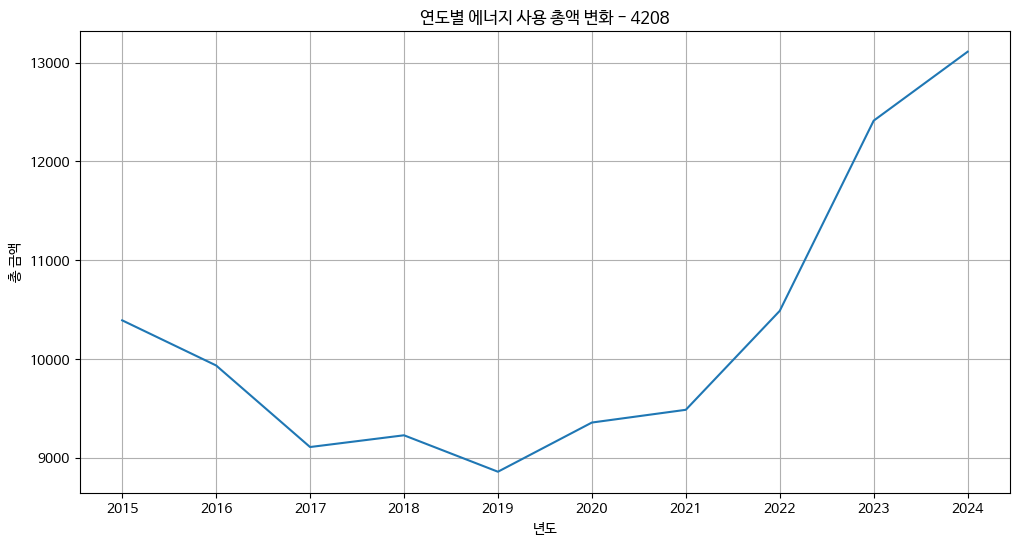

In [1]:
import requests
import pandas as pd
##시각화 함수추가
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


##데이터 보관
energeData =[]

##검색기간 함수
def get_year_months():
  year_months =[]
  for year in range(2015, 2025):
    for month in range (1, 13):
      year_months.append(f'{year}{month:02d}')
  return year_months

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/1613000/ApHusEnergyUseInfoOfferServiceV2/getWntyAvrgEnergyUseAmountInfoSearchV2'
api_key = 'e9258db122c6a870151200b3a6853a13d62e7f6a176c2fe8044b0c484826cd03'

##2015~ 2024까지 데이터 수집반복
for year_months in get_year_months():
  params = {
      'serviceKey': api_key,
      'searchDate': year_months,
      'returnType': 'json',
      'numOfRows': '100',
      'pageNo': '1',
      'sidoName': '서울',
      'ver': '1.0'
  }

  ## 데이터 수집
  response = requests.get(url, params=params)

  ##저장데이터 추출
  data =  response.json()['response']['body']['item']

  ##검색월 추가
  data['searchDate'] = year_months
  energeData.append(data)

  ## 호출 성공/실패 이력저장 실패시에만 이력저장
  if response.status_code != 200:
    ##print(f"API 호출 성공[검색월: {year_months}]")
    ##print(response.json())
    with open('energe.log' , mode='a') as f:
      f.write(f"검색월{year_months} 실패\n")

##pandas DataFrame 변환
df = pd.DataFrame(energeData)

##데이터전처리 year, season 컬럼추가 2025.0922 date타입으로 변경필요
df.insert(1,'year',df['searchDate'].str.slice(0, 4) )
df.insert(2,'season',df['searchDate'].str.slice(4, 6).replace(['03','04','05'], '봄').replace(['06','07','08'], '여름').replace(['09','10','11'], '가을').replace(['12','01','02'], '겨울') )

##사용에너지 총량 추가
df.insert(3,'tot', df['heat']+df['waterHot']+df['gas']+df['elect'])
##print(df.groupby('year')['tot'].sum())

##데이터순서 변경
df = df[['searchDate','year','season','tot','heat','waterHot','gas','elect','waterCool']]
##df

plt.figure(figsize=(12, 6))
plt.plot(df.groupby('year')['tot'].sum())
plt.title("연도별 에너지 사용 총액 변화 - 4208")
plt.xlabel("년도")
plt.ylabel("총 금액")
plt.grid(True)
plt.show()



3-2 계절별 난방사용금액 평균을 막대 그래프로 시각화

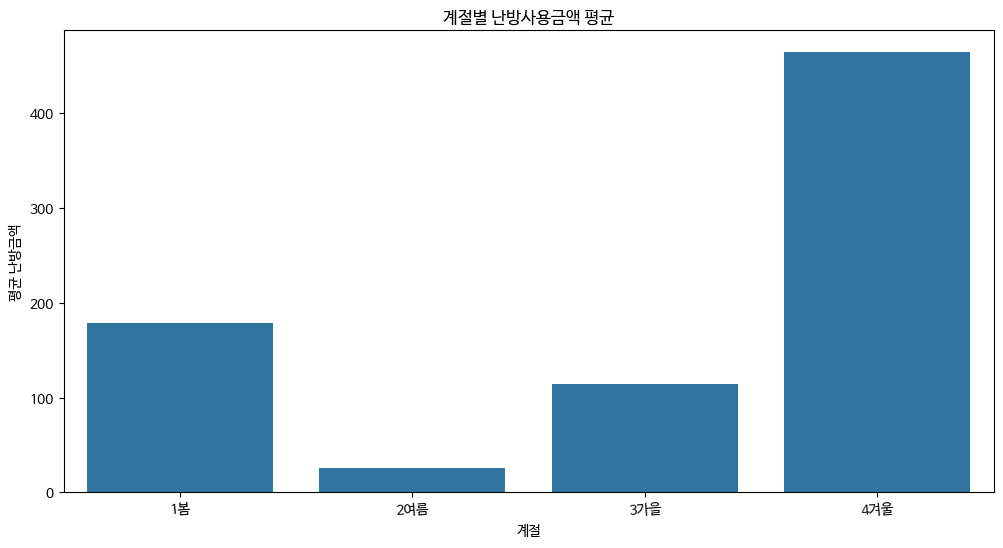

In [45]:
import requests
import pandas as pd
##시각화 함수추가
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns


##막대래프 평균
import numpy as np

##데이터 보관
energeData =[]

##검색기간 함수
def get_year_months():
  year_months =[]
  for year in range(2015, 2016):  ##기간임시조정
    for month in range (1, 13):
      year_months.append(f'{year}{month:02d}')
  return year_months

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/1613000/ApHusEnergyUseInfoOfferServiceV2/getWntyAvrgEnergyUseAmountInfoSearchV2'
api_key = 'e9258db122c6a870151200b3a6853a13d62e7f6a176c2fe8044b0c484826cd03'

##2015~ 2024까지 데이터 수집반복
for year_months in get_year_months():
  params = {
      'serviceKey': api_key,
      'searchDate': year_months,
      'returnType': 'json',
      'numOfRows': '100',
      'pageNo': '1',
      'sidoName': '서울',
      'ver': '1.0'
  }

  ## 데이터 수집
  response = requests.get(url, params=params)

  ##저장데이터 추출
  data =  response.json()['response']['body']['item']

  ##검색월 추가
  data['searchDate'] = year_months
  energeData.append(data)

  ## 호출 성공/실패 이력저장 실패시에만 이력저장
  if response.status_code != 200:
    ##print(f"API 호출 성공[검색월: {year_months}]")
    ##print(response.json())
    with open('energe.log' , mode='a') as f:
      f.write(f"검색월{year_months} 실패\n")

##pandas DataFrame 변환
df = pd.DataFrame(energeData)

##데이터전처리 year, season 컬럼추가 2025.0922 date타입으로 변경필요
df.insert(1,'year',df['searchDate'].str.slice(0, 4) )
df.insert(2,'season',df['searchDate'].str.slice(4, 6).replace(['03','04','05'], '1봄').replace(['06','07','08'], '2여름').replace(['09','10','11'], '3가을').replace(['12','01','02'], '4겨울') )

##사용에너지 총량 추가
df.insert(3,'tot', df['heat']+df['waterHot']+df['gas']+df['elect'])
##print(df.groupby('year')['tot'].sum())


##데이터순서 변경
df = df[['searchDate','year','season','tot','heat','waterHot','gas','elect','waterCool']]
df

# plt.figure(figsize=(12, 6))
# plt.plot(df.groupby('year')['tot'].sum())
# plt.title("연도별 에너지 사용 총액 변화 - 4208")
# plt.xlabel("년도")
# plt.ylabel("총 금액")
# plt.grid(True)
# plt.show()



##계절별 난방사용금액 평균
season_heat_avg = df.groupby('season')['heat'].mean()

season_heat_avg


plt.figure(figsize=(12, 6))
sns.barplot( data = season_heat_avg )
#plt.bar(df['season'],season_heat_avg)
plt.xticks(rotation = 4)
plt.title('계절별 난방사용금액 평균')
plt.xlabel('계절')
plt.ylabel("평균 난방금액")

plt.show()

